This notebook contains code to plot a gamma distribution as well as example simulations using s values from the gamma distribution

In [7]:
%pylab inline
import sys
import os
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
from Joint_method_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.ticker as ticker
PLOTDIR = 'pdfs-round1'
PLOTPREFIX = 'Figure1a-'

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta', 'mean', 'copy', 'random', 'median']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
# Function to plot allele frequencies
def plot_freqs(i, num_alleles, allele_freqs, s, filename, to_save=False):
     
    fig = plt.figure(i)
    ax = fig.add_subplot(111)
       
    ax.bar(list(range(-1*int(num_alleles/2), int(num_alleles/2)+1)), allele_freqs)
    ax.set_xlabel("Allele",size=15)
    ax.set_ylabel("Frequency",size=15)
    plt.xticks(fontsize=15) 
    plt.yticks(fontsize=15)
    plt.title('S value: ' + str(s))
    if to_save == True:
        plt.savefig(filename, bbox_inches='tight')

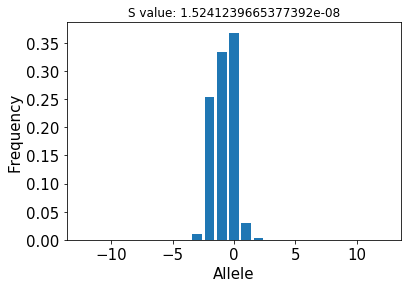

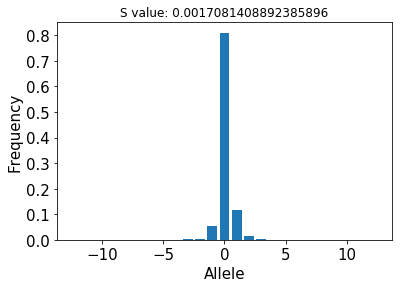

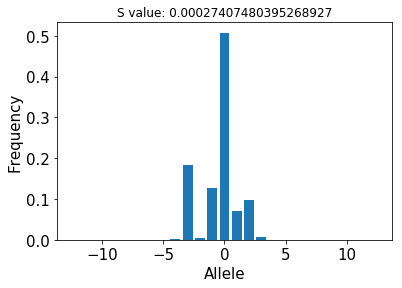

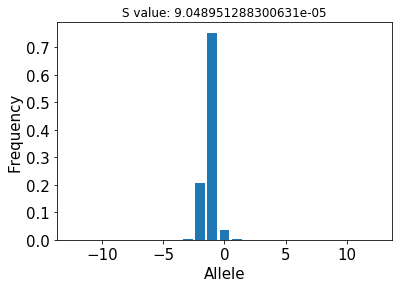

In [9]:
# Simulation parameters
num_alleles = 25
n_effec = 7310
max_iter = 55920
end_samp_n = 6500

# Mutation model parameters
mu = 10**-3.5
beta = 0.3
p = 0.9
L = 0.33
    
i = 1 # Figure number
    
# Plot example allele frequencies for different s values
a = 0.2
b = 0.005
svals = []
for j in range(0, 4):
    sval = np.random.gamma(a, b)
    if sval > 1:
        sval = 1
    svals.append(sval)
    
for sval in svals:
    i = i + 1
    allele_freqs_20k, allele_freqs_50k, allele_freqs_euro = Simulate(num_alleles, n_effec, mu, beta, p, L, sval, max_iter, end_samp_n)
          
    filename = os.path.join(PLOTDIR, PLOTPREFIX + 'example_allele_freqs_'+ str(i) + '.pdf')
    plot_freqs(i, num_alleles, allele_freqs_euro, sval, filename)

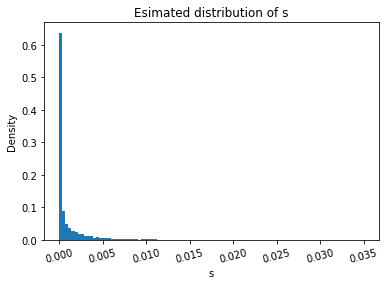

In [10]:
# Plot estimated distribution of s
num_sims = 10000
svals, median, mean = GetGammaBins(a, b, num_sims, True)
i = i + 1
plt.figure(i)
plt.hist(svals, bins = 100, weights=np.ones(len(svals))/len(svals)) 
plt.xlabel("s")
plt.ylabel("Density")
plt.title("Esimated distribution of s")
plt.xticks(rotation=15) 
plt.savefig(os.path.join(PLOTDIR, PLOTPREFIX + "estimated_gamma_distribution_s.pdf"),bbox_inches='tight')

In [12]:
!pwd

/storage/mgymrek/workspace/STRSelection/figures-submit-round1


/storage/resources/source/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


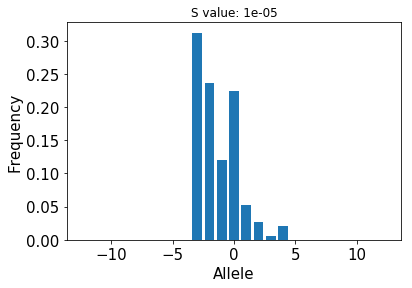

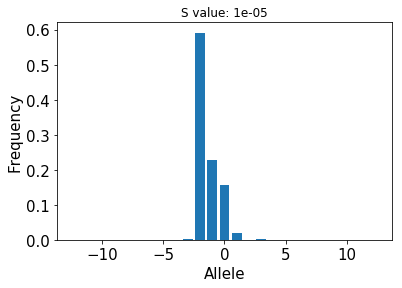

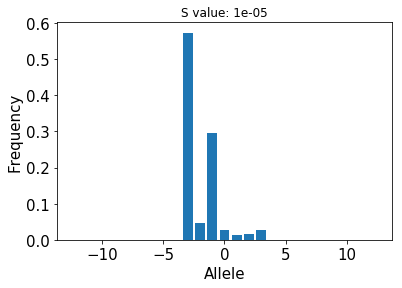

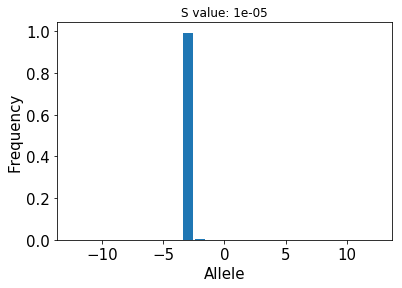

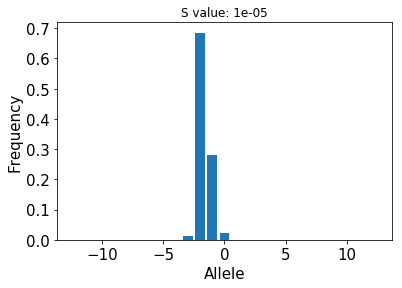

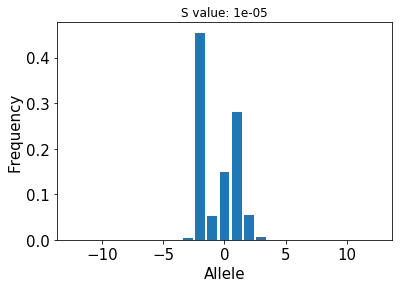

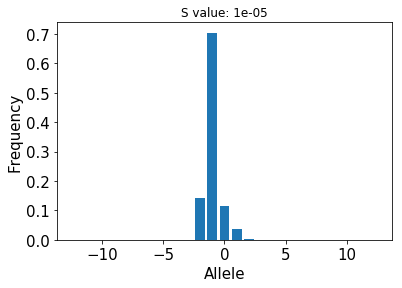

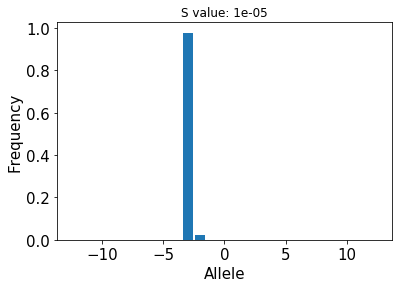

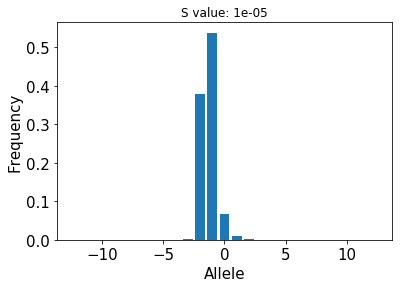

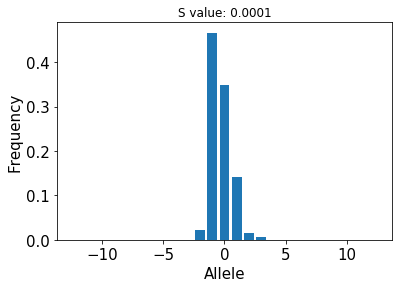

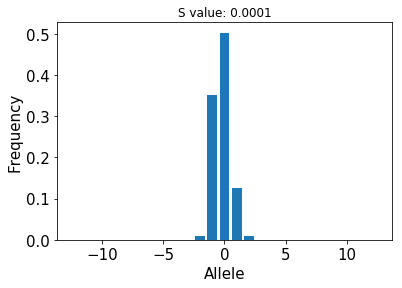

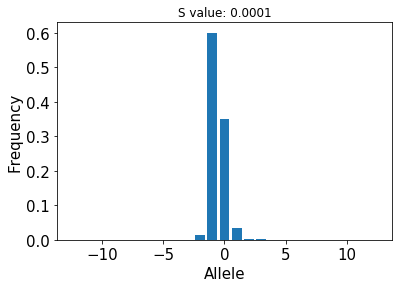

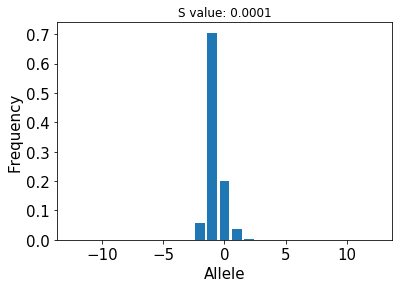

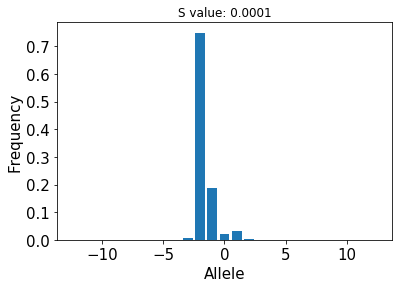

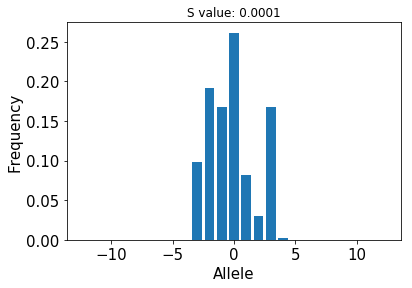

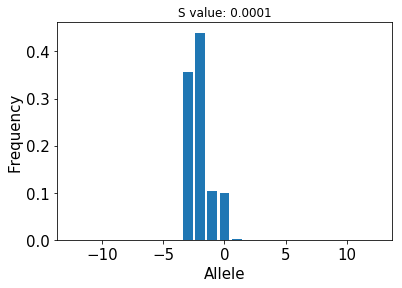

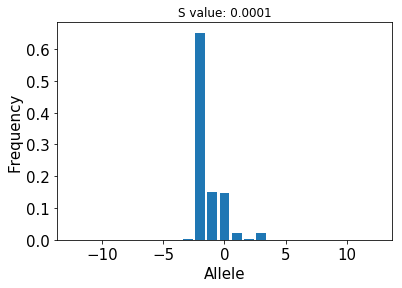

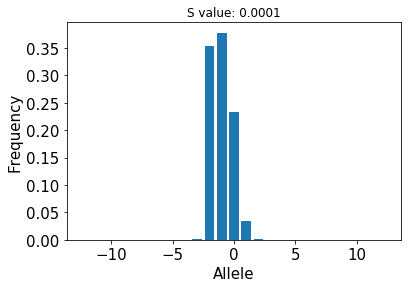

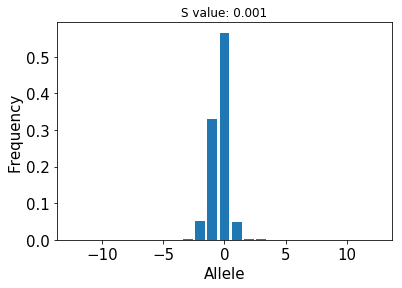

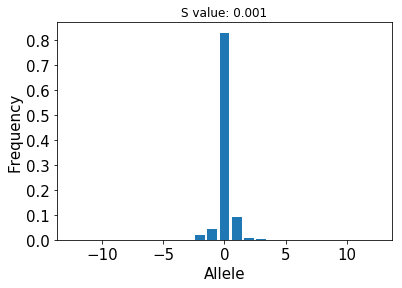

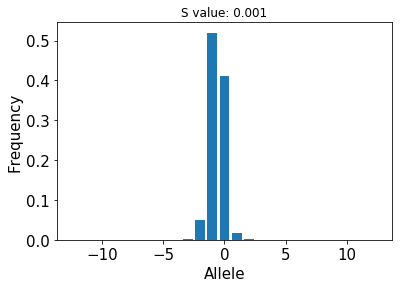

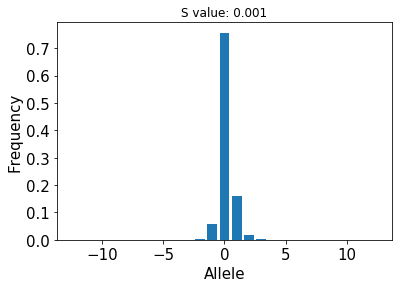

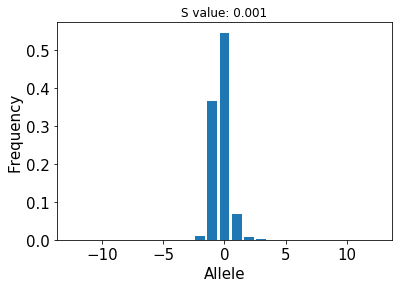

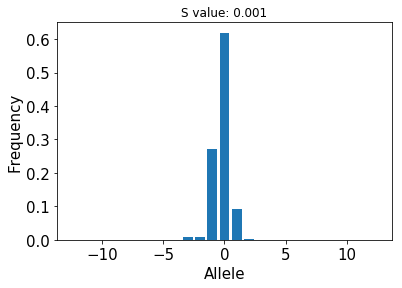

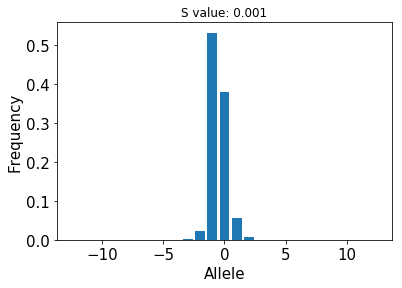

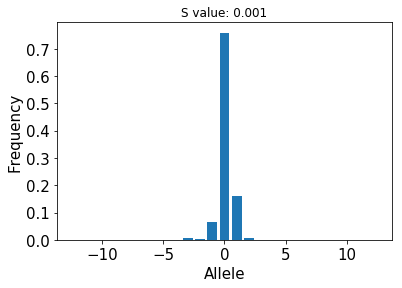

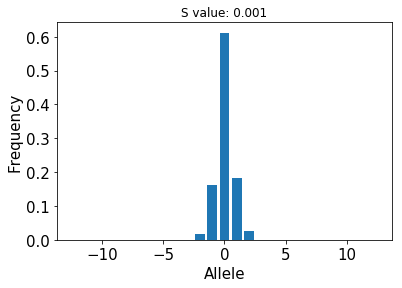

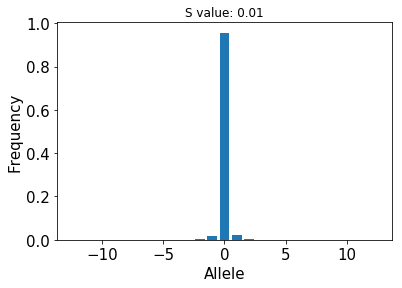

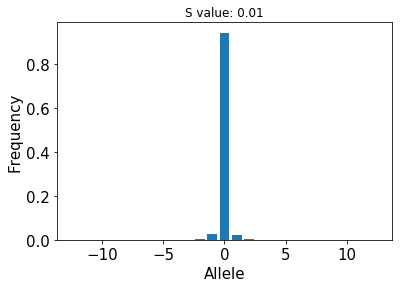

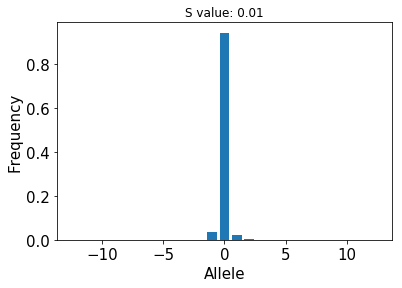

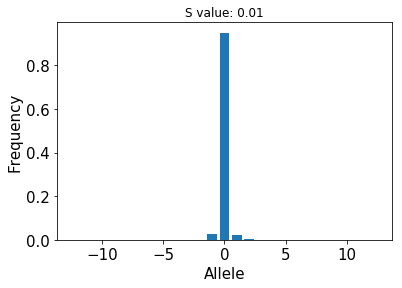

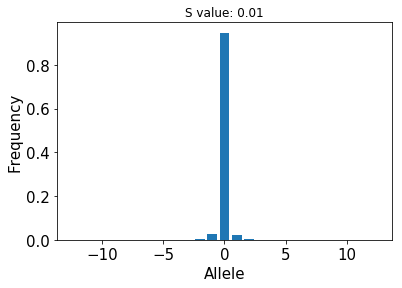

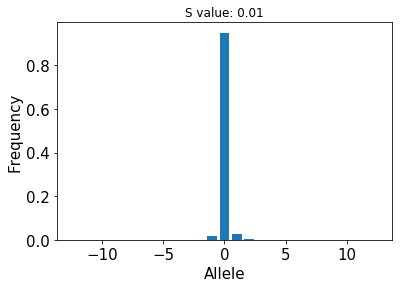

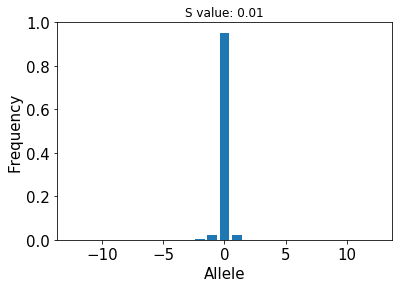

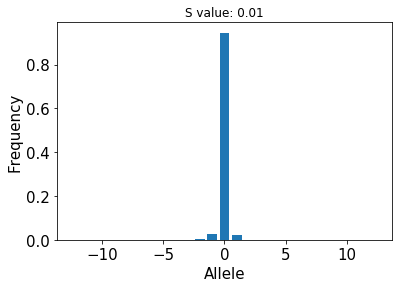

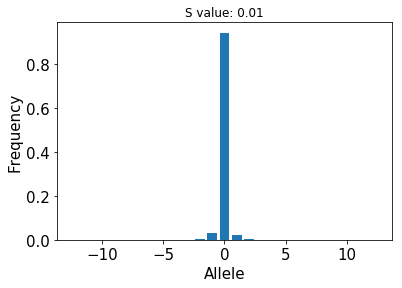

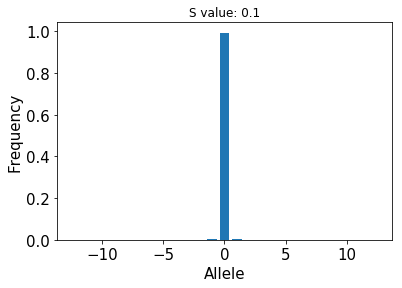

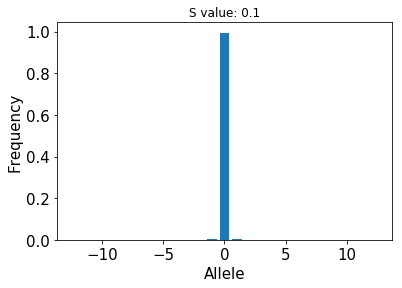

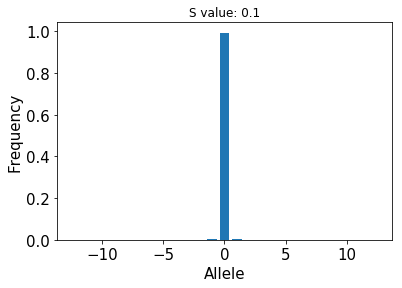

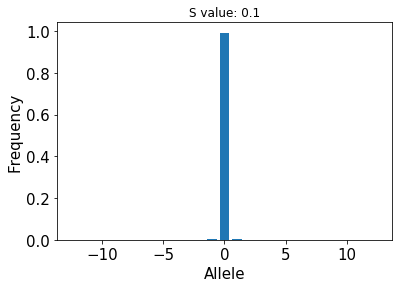

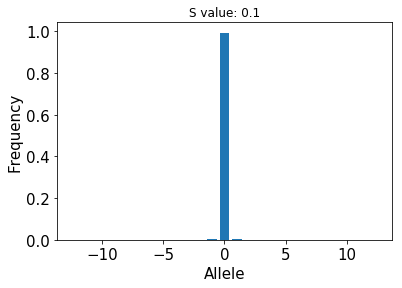

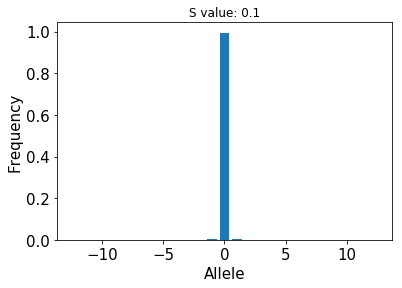

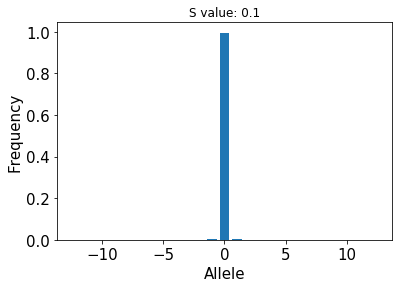

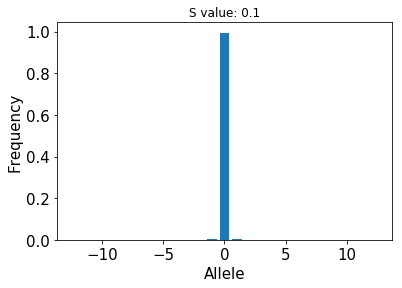

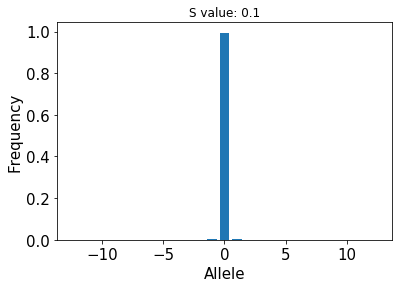

In [11]:
# Plot variety in simulated allele frequencies for given s value
# Simulation parameters
num_alleles = 25
n_effec = 7310
max_iter = 55920
end_samp_n = 6500

# Mutation model parameters
mu = 10**-3.5
beta = 0.3
p = 0.9
L = 0.33
    
svals = [10**-5,10**-4,10**-3,0.01,0.1]
for sval in svals:
    for j in range(0,9):
        i = i + 1
        allele_freqs_20k, allele_freqs_50k, allele_freqs_euro = Simulate(num_alleles, n_effec, mu, beta, p, L, sval, max_iter, end_samp_n)

        filename = os.path.join(PLOTDIR, PLOTPREFIX + 'example_allele_freqs_'+ str(i) + '.pdf')
        plot_freqs(i, num_alleles, allele_freqs_euro, sval, filename, True)